# Sujet 1 : Concentration de CO2 dans l'atmosphère depuis 1958

## Traitement des données : pre-processing

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import numpy as np

Extraction des données depuis l'url et création d'une copie locale :

In [3]:
data_url = 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv'

In [4]:
# read data from url (and delete header)
raw_data = pd.read_csv(data_url, skiprows=44, names=['date','CO2'])
# path for local copy
file = '/home/jovyan/work/module3/exo3/weekly_in_situ_co2_mlo.csv'
# check existing local copy
try:
    local_data = pd.read_csv(file)
# if no local copy, create it
except FileNotFoundError:
    raw_data.to_csv('weekly_in_situ_co2_mlo.csv')
# read local copy
raw_data = pd.read_csv('weekly_in_situ_co2_mlo.csv')

Vérification et suppression de données manquantes :

In [5]:
raw_data[raw_data.isnull().any(axis=1)]
data = raw_data.dropna().copy()

Empty DataFrame
Columns: [Unnamed: 0, date, CO2]
Index: []

Conversion des semaines :

In [7]:
import dateutil.parser
data['period'] = [dateutil.parser.parse(strdate) for strdate in data['date']]

Tri des données et affichage

            Unnamed: 0        date     CO2
period                                    
1958-03-29           0  1958-03-29  316.19
1958-04-05           1  1958-04-05  317.31
1958-04-12           2  1958-04-12  317.69
1958-04-19           3  1958-04-19  317.58
1958-04-26           4  1958-04-26  316.48
1958-05-03           5  1958-05-03  316.95
1958-05-17           6  1958-05-17  317.56
1958-05-24           7  1958-05-24  317.99
1958-07-05           8  1958-07-05  315.85
1958-07-12           9  1958-07-12  315.85


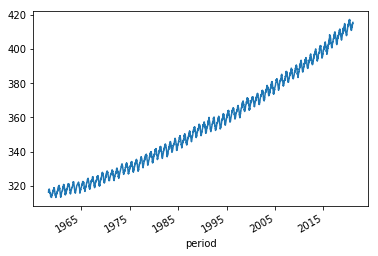

In [8]:
sorted_data = data.set_index('period').sort_index()
sorted_data['CO2'].plot()
print(sorted_data[:10])

## Détermination des modèles d'évolution
Calcul des émissions de CO2 pour l'année 1960 :

In [31]:
absc = []
ordo = []
for i in range(len(data.period)):
    if '1960' in data.date[i]:
        absc.append(data.period[i])
        ordo.append(data.CO2[i])
mean = np.mean(ordo)

L'oscillation périodique suit une évolution sinusoïdale.

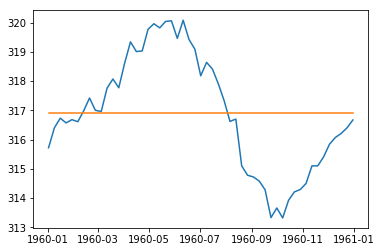

In [30]:
plt.plot(absc, ordo)
plt.plot(absc, [mean]*len(absc))